In [1]:
from scipy import stats

In [2]:
#stats.norm.cdf(x, mean, standard deviation)

stats.norm.cdf(70,60,10) #84% of the information is less than 70

0.8413447460685429

In [3]:
stats.norm.cdf(680,711,29) #14.25% of the information is less than 680

0.14254260383881612

In [4]:
# between 697 and 740

x = stats.norm.cdf(697,711,29)
y= stats.norm.cdf(740,711,29)
y-x

0.5267111786415019

In [6]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
beml = pd.read_csv("BEML.csv")
glaxo = pd.read_csv("GLAXO.csv")

In [8]:
beml.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [9]:
glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


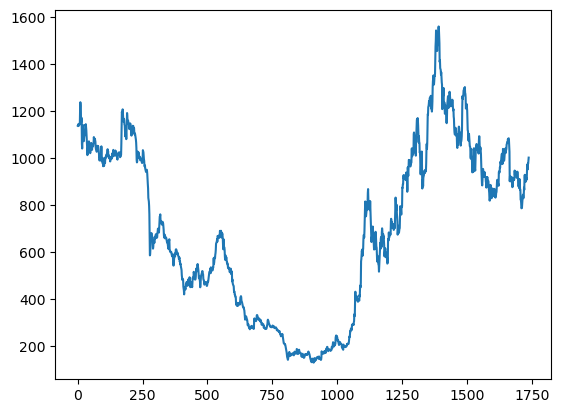

In [10]:
plt.plot(beml["Close"])

In [12]:
beml1 = beml[["Date","Close"]]
glaxo1 = glaxo[["Date","Close"]]

In [14]:
glaxo1

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


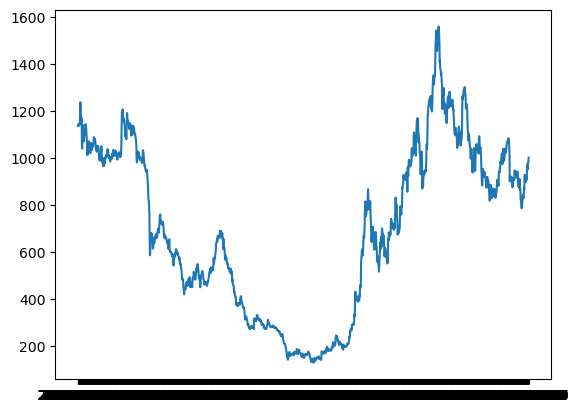

In [15]:
plt.plot(beml1["Date"],beml1["Close"])

In [16]:
beml1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1739 non-null   object 
 1   Close   1739 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.3+ KB


In [18]:
beml1 = beml1.set_index(pd.DatetimeIndex(beml1["Date"]))
glaxo1 = glaxo1.set_index(pd.DatetimeIndex(glaxo1["Date"]))

In [19]:
beml1

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


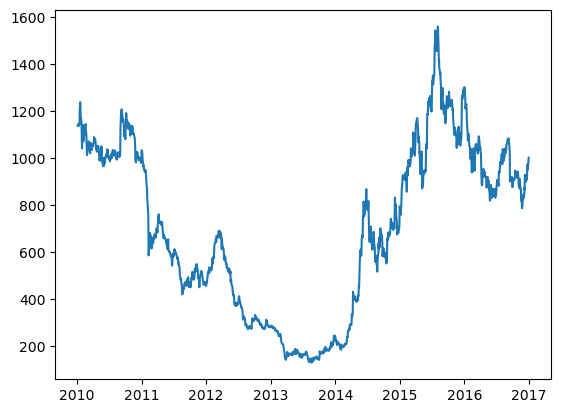

In [21]:
plt.plot(beml1["Close"])

Text(0.5, 1.0, 'Closing price trend for Glaxo')

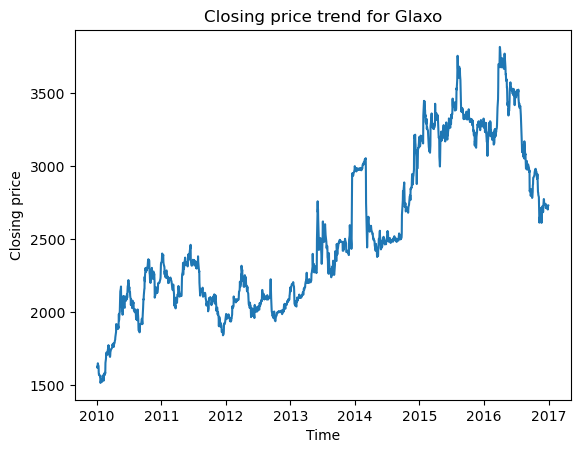

In [23]:
plt.plot(glaxo1["Close"])
plt.xlabel("Time")
plt.ylabel("Closing price")
plt.title("Closing price trend for Glaxo")

In [24]:
glaxo1["gain"] = glaxo1["Close"].pct_change(periods=1)
beml1["gain"] = beml1["Close"].pct_change(periods=1)

In [25]:
glaxo1

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [26]:
beml1

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [27]:
beml1.dropna(inplace=True)
glaxo1.dropna(inplace=True)

In [29]:
glaxo1

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


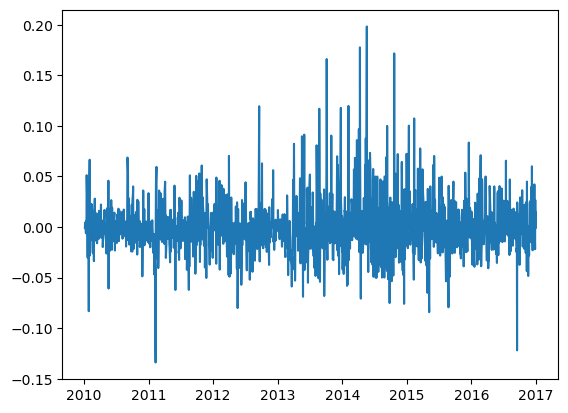

In [30]:
plt.plot(beml1["gain"])

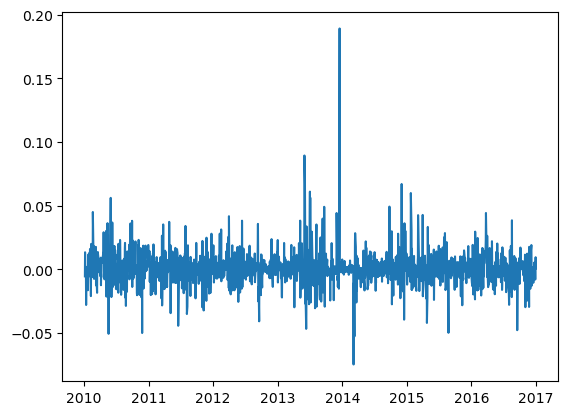

In [31]:
plt.plot(glaxo1["gain"])

<Axes: xlabel='gain', ylabel='Density'>

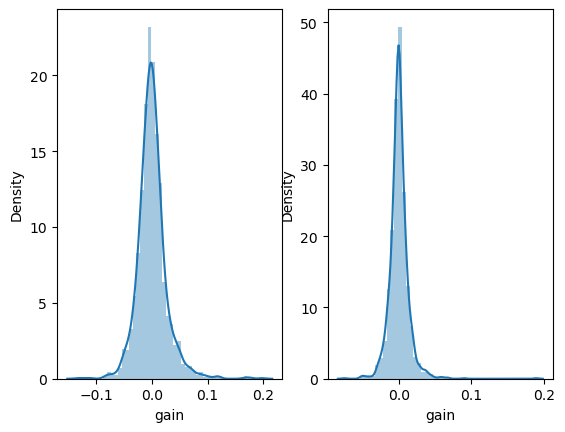

In [35]:
plt.subplot(1,2,1)
sns.distplot(beml1["gain"])

plt.subplot(1,2,2)
sns.distplot(glaxo1["gain"])

In [39]:
print("Mean of BEML ", np.round(beml1["gain"].mean(),6))
print("standard deviation of BEML ", np.round(beml1["gain"].std(),6))

Mean of BEML  0.000271
standard deviation of BEML  0.026431


In [40]:
print("Mean of GLAXO ", np.round(glaxo1["gain"].mean(),6))
print("standard deviation of GLAXO ", np.round(glaxo1["gain"].std(),6))

Mean of GLAXO  0.000386
standard deviation of GLAXO  0.013361


In [41]:
beml_mean = beml1["gain"].mean()
beml_std = beml1["gain"].std()

glaxo_mean = glaxo1["gain"].mean()
glaxo_std = glaxo1["gain"].std()

In [42]:
stats.norm.cdf(-0.02,beml_mean,beml_std)

0.22155987503755287

In [43]:
stats.norm.cdf(-0.02,glaxo_mean,glaxo_std) # there is 6% chance of incurring 2% loss or higher in glaxo

0.06352488667177397

In [44]:
#2% gain or higher
1 - stats.norm.cdf(0.02,beml_mean,beml_std)

0.22769829484075355